In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel('Delhi.xlsx',header=2,usecols=['date','pm25'],date_parser=True)
data.head()

,date,pm25
0,2018-04-20 00:00:00,92
1,2018-04-19 23:00:00,89
2,2018-04-19 22:00:00,75
3,2018-04-19 21:00:00,57
4,2018-04-19 20:00:00,57


In [3]:
data=data.sort_values(by='date').reset_index()

In [4]:
data.head()

,index,date,pm25
0,2373,2018-01-01 00:00:00,423
1,2372,2018-01-01 01:00:00,414
2,2371,2018-01-01 02:00:00,417
3,2370,2018-01-01 03:00:00,466
4,2369,2018-01-01 04:00:00,470


In [5]:
data=data.drop(['index'],axis=1)

In [6]:
data.head()

,date,pm25
0,2018-01-01 00:00:00,423
1,2018-01-01 01:00:00,414
2,2018-01-01 02:00:00,417
3,2018-01-01 03:00:00,466
4,2018-01-01 04:00:00,470


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2374 non-null   datetime64[ns]
 1   pm25    2374 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 37.2+ KB


In [8]:
data['pm25']=data['pm25'].replace(to_replace='-',value=np.nan)

In [9]:
data['pm25']=data['pm25'].fillna(method='ffill')

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


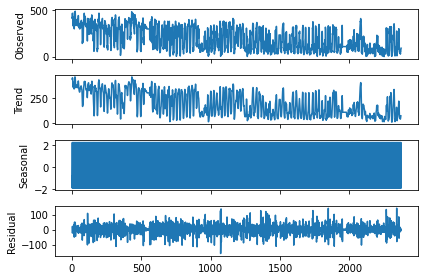

In [12]:
decompose_ts_add = seasonal_decompose(data.pm25,freq=4)
decompose_ts_add.plot()
plt.show()

In [13]:
#data['date'] = pd.to_datetime(data.date,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

data["month"] = data.date.dt.strftime("%b") # month extraction
data["year"] =data.date.dt.strftime("%Y") # year extraction

#Walmart["Day"] = Walmart.Date.dt.strftime("%d") # Day extraction
#Walmart["wkday"] = Walmart.Date.dt.strftime("%A") # weekday extraction

In [14]:
data.head()

,date,pm25,month,year
0,2018-01-01 00:00:00,423.0,Jan,2018
1,2018-01-01 01:00:00,414.0,Jan,2018
2,2018-01-01 02:00:00,417.0,Jan,2018
3,2018-01-01 03:00:00,466.0,Jan,2018
4,2018-01-01 04:00:00,470.0,Jan,2018


In [15]:
data['logpm25']=np.log(data['pm25'])

In [16]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [17]:
train=data.head(2364)
test=data.tail(10)

In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

Data Driven Methods

In [19]:
ses_model = SimpleExpSmoothing(train['pm25']).fit(smoothing_level=1)
pred_ses = ses_model.predict(start =test.index[0],end =test.index[-1])
MAPE(pred_ses,test.pm25) 
#Simple Exponential Smoothing

33.365699451816134

In [20]:
ses_model = SimpleExpSmoothing(train['logpm25']).fit(smoothing_level=1)
pred_ses = ses_model.predict(start =test.index[0],end =test.index[-1])
MAPE(pred_ses,test.logpm25) 
#Simple Exponential Smoothing

8.163526675547544

In [21]:
# Holt method 
hw_model = Holt(train['pm25']).fit(smoothing_level=1, smoothing_slope=1)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.pm25) 

70.42323385643343

In [22]:
# Holt method 
hw_model = Holt(train['logpm25']).fit(smoothing_level=1, smoothing_slope=1)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.logpm25) 

18.622550200140964

In [23]:
hwe_model_add_add = ExponentialSmoothing(train['pm25'],trend="add").fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.pm25) 
#Holts winter with exponential smoothing with addictive trend

33.365699451816134

In [24]:
hwe_model_add_add = ExponentialSmoothing(train['logpm25'],trend="add").fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.logpm25) 
#Holts winter with exponential smoothing with addictive trend

8.163526675547544

In [25]:
hwe_model_add_add = ExponentialSmoothing(train['pm25'],trend="add",seasonal='add',seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.pm25) 
#Holts winter with exponential smoothing with addictive trend and addictive seasonality

53.767383525963695

In [26]:
we_model_add_add = ExponentialSmoothing(train['logpm25'],trend="add",seasonal='add',seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.logpm25) 
#Holts winter with exponential smoothing with addictive trend and addictive seasonality

553.380983021608

In [27]:
hwe_model_mul_add = ExponentialSmoothing(train["pm25"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.pm25)
#Holts winter with exponential smoothing with addictive trend and multiplicative seasonality

43.09399286607995

In [29]:
hwe_model_mul_add = ExponentialSmoothing(train["pm25"],seasonal="mul",trend="mul",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.pm25)
#Holts winter with exponential smoothing with multiplicative trend and multiplicative seasonality

35.18113276678143

Model based methods

In [30]:
data.head()

,date,pm25,month,year,logpm25
0,2018-01-01 00:00:00,423.0,Jan,2018,6.047372
1,2018-01-01 01:00:00,414.0,Jan,2018,6.025866
2,2018-01-01 02:00:00,417.0,Jan,2018,6.033086
3,2018-01-01 03:00:00,466.0,Jan,2018,6.144186
4,2018-01-01 04:00:00,470.0,Jan,2018,6.152733


In [31]:
from sklearn.preprocessing import LabelEncoder
sc=LabelEncoder()
data['t']=sc.fit_transform(data['month'])

In [32]:
data['tsqaure']=data['t']*data['t']

In [33]:
data.head()

,date,pm25,month,year,logpm25,t,tsqaure
0,2018-01-01 00:00:00,423.0,Jan,2018,6.047372,2,4
1,2018-01-01 01:00:00,414.0,Jan,2018,6.025866,2,4
2,2018-01-01 02:00:00,417.0,Jan,2018,6.033086,2,4
3,2018-01-01 03:00:00,466.0,Jan,2018,6.144186,2,4
4,2018-01-01 04:00:00,470.0,Jan,2018,6.152733,2,4


In [34]:
Train = data.head(2364)
Test = data.tail(10)

In [35]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('pm25~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['pm25'])-np.array(pred_linear))**2))
rmse_linear

120.2567770660779

In [36]:
#Exponential

Exp = smf.ols('logpm25~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['pm25'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

67.84911071054253

In [37]:
#Quadratic
Quad = smf.ols('pm25~t+tsqaure',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","tsqaure"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['pm25'])-np.array(pred_Quad))**2))
rmse_Quad

35.00398889632396

ARIMA MODEL

In [38]:
df=data.copy()
df.head()

,date,pm25,month,year,logpm25,t,tsqaure
0,2018-01-01 00:00:00,423.0,Jan,2018,6.047372,2,4
1,2018-01-01 01:00:00,414.0,Jan,2018,6.025866,2,4
2,2018-01-01 02:00:00,417.0,Jan,2018,6.033086,2,4
3,2018-01-01 03:00:00,466.0,Jan,2018,6.144186,2,4
4,2018-01-01 04:00:00,470.0,Jan,2018,6.152733,2,4


In [39]:
df=df.drop(['pm25','month','year','t','tsqaure'],axis=1)

In [40]:
df=df.set_index('date')
df.head()

,logpm25
date,
2018-01-01 00:00:00,6.047372
2018-01-01 01:00:00,6.025866
2018-01-01 02:00:00,6.033086
2018-01-01 03:00:00,6.144186
2018-01-01 04:00:00,6.152733


In [41]:
from statsmodels.tsa.arima_model import ARIMA

In [42]:
split_point = len(df) - 10
dataset, validation = df[0:split_point],df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 2364, Validation 10


In [43]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [44]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=5.407, Expected=5.476
>Predicted=5.476, Expected=5.587
>Predicted=5.587, Expected=5.011
>Predicted=5.011, Expected=5.403
>Predicted=5.403, Expected=5.481
>Predicted=5.481, Expected=5.756
>Predicted=5.756, Expected=5.762
>Predicted=5.762, Expected=5.835
>Predicted=5.835, Expected=5.820
>Predicted=5.820, Expected=5.707
>Predicted=5.707, Expected=5.165
>Predicted=5.165, Expected=5.338
>Predicted=5.338, Expected=5.553
>Predicted=5.553, Expected=5.308
>Predicted=5.308, Expected=5.142
>Predicted=5.142, Expected=5.017
>Predicted=5.017, Expected=4.718
>Predicted=4.718, Expected=5.004
>Predicted=5.004, Expected=5.165
>Predicted=5.165, Expected=5.328
>Predicted=5.328, Expected=5.497
>Predicted=5.497, Expected=5.753
>Predicted=5.753, Expected=5.743
>Predicted=5.743, Expected=5.753
>Predicted=5.753, Expected=5.730
>Predicted=5.730, Expected=5.743
>Predicted=5.743, Expected=5.720
>Predicted=5.720, Expected=5.733
>Predicted=5.733, Expected=5.775
>Predicted=5.775, Expected=5.861
>Predicted

In [45]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [46]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
#load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.995
ARIMA(0, 0, 1) RMSE=0.674
ARIMA(0, 1, 0) RMSE=0.533
ARIMA(0, 1, 1) RMSE=0.531
ARIMA(0, 1, 2) RMSE=0.527
ARIMA(0, 1, 3) RMSE=0.518
ARIMA(0, 1, 4) RMSE=0.505
ARIMA(0, 2, 0) RMSE=0.720
ARIMA(0, 2, 1) RMSE=0.533
ARIMA(0, 2, 2) RMSE=0.532
ARIMA(1, 0, 0) RMSE=0.514
ARIMA(1, 0, 1) RMSE=0.506
ARIMA(1, 0, 2) RMSE=0.507
ARIMA(1, 0, 3) RMSE=0.506
ARIMA(1, 0, 4) RMSE=0.506
ARIMA(1, 1, 0) RMSE=0.532
ARIMA(1, 1, 1) RMSE=0.506
ARIMA(1, 2, 0) RMSE=0.674
ARIMA(2, 0, 0) RMSE=0.507
ARIMA(2, 0, 1) RMSE=0.508
ARIMA(2, 0, 2) RMSE=0.508
ARIMA(2, 0, 4) RMSE=0.507
ARIMA(2, 1, 0) RMSE=0.525
ARIMA(2, 1, 1) RMSE=0.495
ARIMA(2, 1, 2) RMSE=0.498
ARIMA(2, 1, 3) RMSE=0.494
ARIMA(2, 1, 4) RMSE=0.496
ARIMA(2, 2, 0) RMSE=0.646
ARIMA(3, 0, 0) RMSE=0.507
ARIMA(3, 0, 1) RMSE=0.508


In [49]:
model = ARIMA(X, order=(4,1,3))
model_fit = model.fit()

In [50]:
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

0.3644373050002415

In [51]:
forecast=model_fit.forecast(steps=10)[0]
forecast

array([4.07429046, 4.05795134, 4.00902893, 4.01768558, 4.10901665,
       4.22379651, 4.27633986, 4.23410404, 4.14678434, 4.10034837])

In [52]:
forecast=np.exp(forecast)
forecast

array([58.80873849, 57.85566309, 55.09334519, 55.57233894, 60.8868148 ,
       68.29226524, 71.97651302, 68.99982966, 63.23034556, 60.36131219])